## Dataset loading

This class uses information of people collaborating in organization X.
It was collected through a survey who says they are collaborating with who, thus it is _directed_ network.
It is stored in matrix format (not as edgelist like previous chapter).

In [11]:
library(igraph)

data <- read.csv('data/org_x_collaboration.csv', header = F )
matrix <- as.matrix( data )

g <- graph_from_adjacency_matrix( matrix, 'directed' )

## Faking some attributes

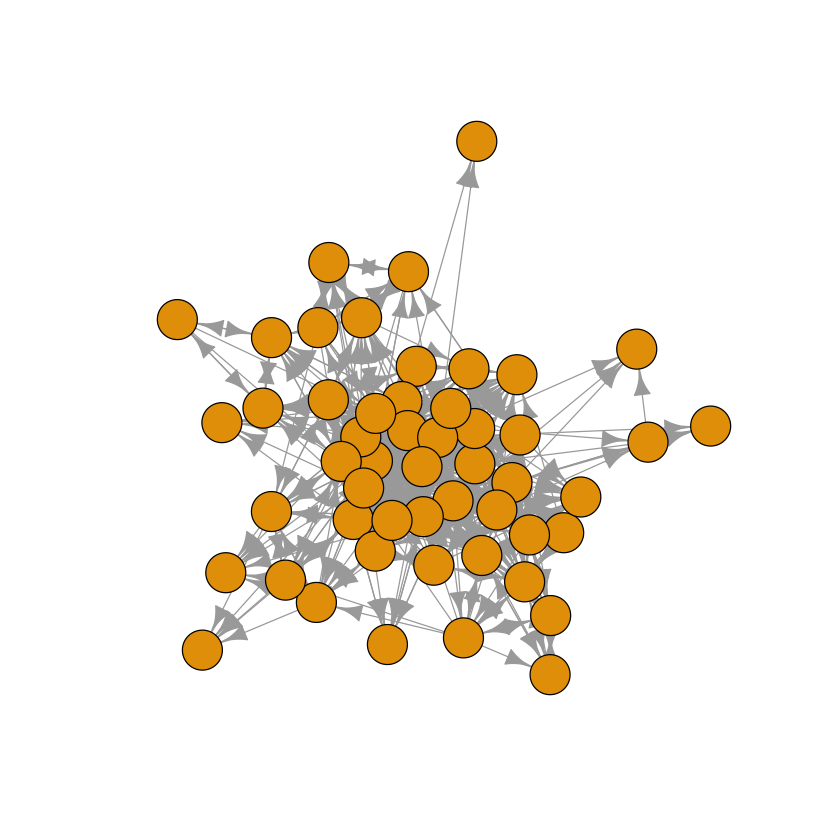

In [12]:
plot( g, layout = layout_with_fr, vertex.label = '' )

In [ ]:
## let's add some attributes to your network
V(g)$gender <- as.numeric( sample(0:1, length( V(g) ), replace = TRUE ) )
V(g)$age <- sample(18:63, length( V(g) ), replace = TRUE )
V(g)$education <- as.numeric( sample(1:5, length( V(g) ), replace = TRUE ) )

## transform network from igraph to network
library(intergraph)
g <- asNetwork( g )

ERROR: Error in set.vertex.attribute.network(rval, attrname = names(vdb)[i], : Inappropriate value given in set.vertex.attribute.



# Enter Exponential Graph Models (ERGM)

So next we will conduct exponential graph model on the network based on

* characteristics of the network
* attributes from the networks

There are many terms you can use to model what occurs in the network, see details from the [reference](https://cran.r-project.org/web/packages/ergm/ergm.pdf).

In [ ]:
library(ergm)
model <- ergm(g ~ edges + nodematch( "gender" ) + absdiff( "age" ) )

Loading required package: network


‘network’ 1.19.0 (2024-12-08), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute



‘ergm’ 4.11.0 (2025-12-22), part of the Statnet Project
* ‘news(package="ergm")’ for changes since last version
* ‘citation("ergm")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


‘ergm’ 4 is a major update that introduces some backwards-incompatible
changes. Please type ‘news(package="ergm")’ for a list of major
changes.




ERROR: Error: In term ‘nodematch’ in package ‘ergm’: ‘gender’ is/are not valid nodal attribute(s).


In [ ]:
summary( model )

In [ ]:
coef(model) ## the model coefficeints

In [ ]:
plogis( coef(model)[['edges']] ) ## likelyhood of a tie between two people
plogis( coef(model)[['edges']] + coef(model)[['nodematch.gender']] ) ## likelyhood of a tie and they have the same gender

* Exercise: Using the network above, try to find a model with better fit. Try different structural (network characteristics) and attribute based variables.
* Based on your best model, how much does it increase the likelyhood of ties
   * if the persons are 10 years apart and have the same gender
   * if they are both male
   
   
_Just to set some expectations: the data here is random, so the models are most likely random as well_